# Projeto em Ciência de Dados com Python
###### Nomes: 
###### Eric Mizote Garcia
###### Flávio Bezerra Pereira
###### Frederico De Meira Bastone
###### Laura Ladeia Maciel

# 1 - Importando as bibliotecas

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 2 - Importando o conjunto de dados que vamos analisar

In [ ]:
url = 'https://raw.githubusercontent.com/flaviobp/python-analise-dados/main/aulas/projetos/metadados_telecomunicacoes/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(url)

**Descrição Variáveis Telecomunicações**
>
* CustomerID: Um ID exclusivo que identifica cada cliente.
* Gender: Sexo do cliente: Masculino, Feminino
* Age: a idade atual do cliente, em anos, no momento em que o trimestre fiscal terminou.
* Senior Citizen: Indica se o cliente tem 65 anos ou mais: Sim, Não
* Married (Partner): Indica se o cliente é casado: Sim, Não
* Dependents: Indica se o cliente mora com algum dependente: Sim, Não. Os dependentes podem ser filhos, pais, avós, etc.
* Number of Dependents: Indica o número de dependentes que moram com o cliente.
* Phone Service: Indica se o cliente assina serviço telefônico residencial com a empresa: Sim, Não
* Multiple Lines: Indica se o cliente assina várias linhas telefônicas com a empresa: Sim, Não
* Internet Service: Indica se o cliente assina serviço de Internet com a empresa: Não, DSL, Fibra Óptica, Cabo.
* Online Security: Indica se o cliente assina um serviço adicional de segurança online fornecido pela empresa: Sim, Não
* Online Backup: Indica se o cliente assina um serviço de backup online adicional fornecido pela empresa: Sim, Não
* Device Protection Plan: Indica se o cliente assina um plano de proteção de dispositivos adicional para seu equipamento de Internet fornecido pela empresa: Sim, Não
* Premium Tech Support: Indica se o cliente assina um plano de suporte técnico adicional da empresa com tempos de espera reduzidos: Sim, Não
* Streaming TV: Indica se o cliente utiliza seu serviço de Internet para transmitir programação de televisão de um provedor terceirizado: Sim, Não. A empresa não cobra taxa adicional por este serviço.
* Streaming Movies: Indica se o cliente usa seu serviço de Internet para fazer streaming de filmes de um provedor terceirizado: Sim, Não. A empresa não cobra taxa adicional por este serviço.
* Contract: Indica o tipo de contrato atual do cliente: mês a mês, um ano, dois anos.
* Paperless Billing: Indica se o cliente optou pelo faturamento sem papel: Sim, Não
* Payment Method: Indica como o cliente paga sua fatura: Saque Bancário, Cartão de Crédito, Cheque Postado
* Monthly Charge: Indica a cobrança mensal total atual do cliente para todos os seus serviços da empresa.
* Total Charges: Indica o total de encargos do cliente, calculado até o final do trimestre especificado acima.
* Tenure: Indica o total de meses em que o cliente está na empresa.
* Churn: Sim = o cliente deixou a empresa neste trimestre. Não = o cliente permaneceu na empresa. Diretamente relacionado ao valor do Churn.

In [ ]:
# Exibindo as primeiras linhas do Dataframe
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# 3 - Preparação dos dados

###### Quando os dados estiverem completamente mapeados chegou o momento de preparação desse dado. Nesta etapa é importante fazer algumas verificações, como por exemplo registros duplicados ou faltantes, dados com formato estranho (como idade negativa, por exemplo), valores que são muito discrepantes (os chamados outliers). O não tratamento desse dado pode induzir a conclusões precipitadas. Nesse ponto é sempre muito importante estar próximo da área que está solicitando o projeto, pois como exemplo, no caso de outliers, muitas vezes o que parece ser um dado discrepante pode ser um comportamento, não muito usual, mas que de fato ocorre no contexto do problema.

**Formato do Dataframe**

In [ ]:
# numero de linhas (7043) e colunas (21) do Data Frame
df.shape

(7043, 21)

**Registro Duplicado**

In [ ]:
# registros duplicados
ids = df.customerID 
df[ids.isin(ids[ids.duplicated()])].sort_values(by="customerID")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:
# contagem de valores distintos para a chave customerID
df['customerID'].nunique()

7043

Conclusão: Não Foram encontrados valores duplicados de acordo com a chave customerID, número de linhas (7043) igual a contagem para valores distintos

**Dados Faltantes**

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Conclusão: Não foram encontrados valores faltantes

**Tipos de dados**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

Conclusão: 3 colunas numéricas e 18 texto

**Análise da padronização das colunas textuais**

In [ ]:
df_text = df.select_dtypes(exclude=[np.number])
df_text.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [ ]:
# customerID não possui valores duplicados (chave do df)
df_text.customerID.nunique()

7043

In [ ]:
# gender - valores corretos
df_text.gender.unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
# Partner - valores corretos
df_text.Partner.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
# Dependents - valores corretos
df_text.Dependents.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# PhoneService - valores corretos
df_text.PhoneService.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# MultipleLines - valor 'No phone service' não mapeado na descricao
df_text.MultipleLines.value_counts(normalize=True)

No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: MultipleLines, dtype: float64

In [ ]:
## replace 'No phone service' para 'No'
df_text.MultipleLines = df_text.MultipleLines.replace({'No phone service':'No'})
df_text.MultipleLines.value_counts(normalize=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


No     0.578163
Yes    0.421837
Name: MultipleLines, dtype: float64

In [ ]:
# InternetService - valor 'Cable' não encontrado
df_text.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [ ]:
# OnlineSecurity - valor 'No internet service' não mapeado na descrição
df_text.OnlineSecurity.value_counts(normalize=True)

No                     0.496663
Yes                    0.286668
No internet service    0.216669
Name: OnlineSecurity, dtype: float64

In [ ]:
## replace 'No internet service' para 'No'
df_text.OnlineSecurity = df_text.OnlineSecurity.replace({'No internet service':'No'})
df_text.OnlineSecurity.value_counts(normalize=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


No     0.713332
Yes    0.286668
Name: OnlineSecurity, dtype: float64

In [ ]:
# OnlineBackup - valor 'No internet service' não mapeado na descrição
df_text.OnlineBackup.value_counts(normalize=True)

No                     0.438450
Yes                    0.344881
No internet service    0.216669
Name: OnlineBackup, dtype: float64

In [ ]:
## replace 'No internet service' para 'No'
df_text.OnlineBackup = df_text.OnlineBackup.replace({'No internet service':'No'})
df_text.OnlineBackup.value_counts(normalize=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


No     0.655119
Yes    0.344881
Name: OnlineBackup, dtype: float64

In [ ]:
# DeviceProtection - valor 'No internet service' não mapeado na descrição
df_text.DeviceProtection.value_counts(normalize=True)

No                     0.439443
Yes                    0.343888
No internet service    0.216669
Name: DeviceProtection, dtype: float64

In [ ]:
## replace 'No internet service' para 'No'
df_text.DeviceProtection = df_text.DeviceProtection.replace({'No internet service':'No'})
df_text.DeviceProtection.value_counts(normalize=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


No     0.656112
Yes    0.343888
Name: DeviceProtection, dtype: float64

In [ ]:
# TechSupport	
df_text.TechSupport.value_counts(normalize=True)

No                     0.493114
Yes                    0.290217
No internet service    0.216669
Name: TechSupport, dtype: float64

In [ ]:
## replace 'No internet service' para 'No'
df_text.TechSupport = df_text.TechSupport.replace({'No internet service':'No'})
df_text.TechSupport.value_counts(normalize=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


No     0.709783
Yes    0.290217
Name: TechSupport, dtype: float64

In [ ]:
# StreamingTV	
df_text.StreamingTV.value_counts(normalize=True)

No                     0.398978
Yes                    0.384353
No internet service    0.216669
Name: StreamingTV, dtype: float64

In [ ]:
## replace 'No internet service' para 'No'
df_text.StreamingTV = df_text.StreamingTV.replace({'No internet service':'No'})
df_text.StreamingTV.value_counts(normalize=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


No     0.615647
Yes    0.384353
Name: StreamingTV, dtype: float64

In [ ]:
# StreamingMovies	
df_text.StreamingMovies.value_counts(normalize=True)

No                     0.395428
Yes                    0.387903
No internet service    0.216669
Name: StreamingMovies, dtype: float64

In [ ]:
## replace 'No internet service' para 'No'
df_text.StreamingMovies = df_text.StreamingMovies.replace({'No internet service':'No'})
df_text.StreamingMovies.value_counts(normalize=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


No     0.612097
Yes    0.387903
Name: StreamingMovies, dtype: float64

In [ ]:
# Contract - valores corretos
df_text.Contract.value_counts(normalize=True)

Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: Contract, dtype: float64

In [ ]:
# PaperlessBilling	- valores corretos
df_text.PaperlessBilling.value_counts(normalize=True)

Yes    0.592219
No     0.407781
Name: PaperlessBilling, dtype: float64

In [ ]:
# PaymentMethod	 - Descricao indica tres possibilidades, mas aparentemente a distribuicao faz sentido
df_text.PaymentMethod.value_counts(normalize=True)

Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: PaymentMethod, dtype: float64

In [ ]:
# TotalCharges - Coluna numérica necessita ser dropada do dt_text e realizar o converte
df_text.TotalCharges.nunique()

6531

In [ ]:
## convert string para float, mas caso ocarra erro nem alguma conversao coloca NaN
df_totalcharges = pd.to_numeric(df_text.TotalCharges, errors='coerce').round(2)
df_totalcharges.isnull().sum()

11

In [ ]:
## df_totalcharges a ser analisado na parte de colunas numéricas
df_totalcharges.head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

In [ ]:
## retirando a coluna TotalCharges no df_text
df_text = df_text.drop(['TotalCharges'], axis=1)

In [ ]:
## retirando as linhas com missing values
df_text = df_text.drop(df_text[df_totalcharges.isnull()].index)
df = df.drop(df[df_totalcharges.isnull()].index)
df_totalcharges = df_totalcharges.drop(df_totalcharges[df_totalcharges.isnull()].index)

In [ ]:
## formato dos dataframes apos a retirada de missing values
df_text.shape

(7032, 17)

In [ ]:
df.shape

(7032, 21)

In [ ]:
df_totalcharges.shape

(7032,)

In [ ]:
## colunas texto
df_text.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [ ]:
# Churn - valores corretos
df_text.Churn.value_counts(normalize=True)

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

**Análise colunas numéricas**

In [ ]:
df_number = df.select_dtypes(include=[np.number])
df_number.head()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


In [ ]:
# Concatenar coluna TotalCharges
df_number['TotalCharges'] = df_totalcharges
df_number.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [ ]:
# estatisticas basicas
df_number.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
# SeniorCitizen é variável categorica
df_number.SeniorCitizen.unique()

array([0, 1])

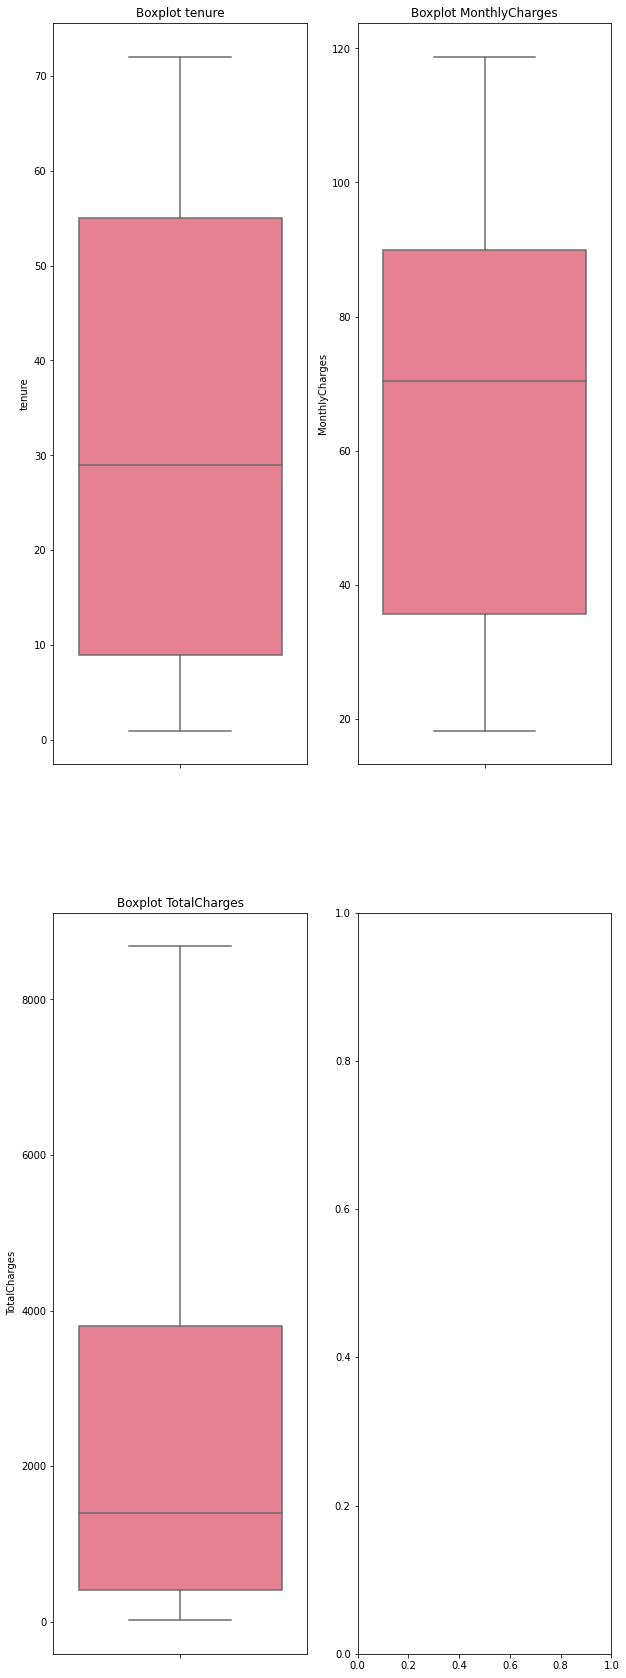

In [ ]:
# boxplot
fig, axes = plt.subplots(2, 2, figsize=(10, 30))
                         
axes[0,0].set_title('Boxplot tenure')
ax1 = sns.boxplot(ax=axes[0,0], y='tenure', palette='husl', data=df_number)
axes[0,1].set_title('Boxplot MonthlyCharges')
ax2 = sns.boxplot(ax=axes[0,1], y='MonthlyCharges', palette='husl', data=df_number)
axes[1,0].set_title('Boxplot TotalCharges')
ax3 = sns.boxplot(ax=axes[1,0], y='TotalCharges', palette='husl', data=df_number)

In [ ]:
# IQR para tenure
q1, q3 = np.percentile(df_number['tenure'], [25, 75])
iqr = q3 - q1

# limite inferior: q1 -(1.5 * iqr) 
# limite superior: q3 +(1.5 * iqr)
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print('lower bound', lower_bound)
print('upper bound', upper_bound)

lower bound -60.0
upper bound 124.0


In [ ]:
df_number['tenure'].sort_values(ascending=False) # sem outliers

2988    72
3823    72
3886    72
6659    72
6661    72
        ..
3852     1
474      1
1371     1
1373     1
0        1
Name: tenure, Length: 7032, dtype: int64

In [ ]:
# IQR para MonthlyCharges
q1, q3 = np.percentile(df_number['MonthlyCharges'], [25, 75])
iqr = q3 - q1

# limite inferior: q1 -(1.5 * iqr) 
# limite superior: q3 +(1.5 * iqr)
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print('lower bound', lower_bound)
print('upper bound', upper_bound)

lower bound -45.82499999999996
upper bound 171.27499999999995


In [ ]:
df_number['MonthlyCharges'].sort_values(ascending=False) # sem outliers

4586    118.75
2115    118.65
4804    118.60
3894    118.60
5127    118.35
         ...  
6906     18.70
1156     18.70
6652     18.55
1529     18.40
3719     18.25
Name: MonthlyCharges, Length: 7032, dtype: float64

In [ ]:
# IQR para TotalCharges
q1, q3 = np.percentile(df_number['TotalCharges'], [25, 75])
iqr = q3 - q1

# limite inferior: q1 -(1.5 * iqr) 
# limite superior: q3 +(1.5 * iqr)
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print('lower bound', lower_bound)
print('upper bound', upper_bound)

lower bound -4688.481250000001
upper bound 8884.66875


In [ ]:
df_number['TotalCharges'].sort_values(ascending=False) # sem outliers

4610    8684.80
4586    8672.45
6768    8670.10
5347    8594.40
2187    8564.75
         ...   
583       19.00
4939      18.90
1151      18.85
6489      18.85
1654      18.80
Name: TotalCharges, Length: 7032, dtype: float64

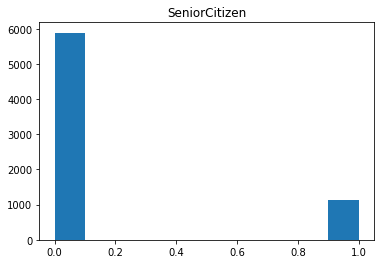

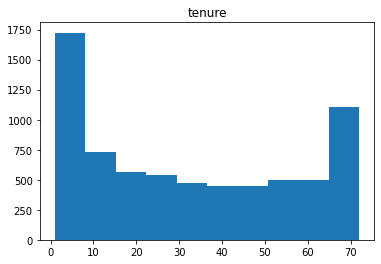

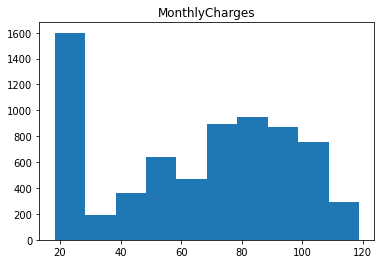

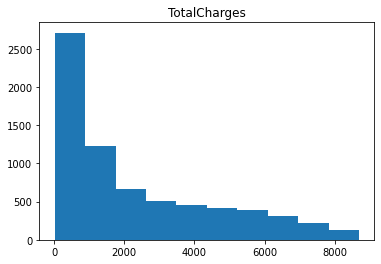

In [ ]:
# Distribuição das variáveis
for i in df_number.columns:
    plt.figure()
    plt.title(i)
    plt.hist(df_number[i])

Conclusão: A partir dos boxplot e do IQR, não encontramos valores discrepantes para serem tratados como outliers. A análise de valores únicos e o histograma foi possível verificar que a coluna SeniorCitizen se trata de uma coluna categorica.

## 4 - Exploração dos dados

###### Uma vez que os dados foram preparados e as inconsistencias foram removidas chegou o momento de experimentar os dados. Nessa etapa é importante para que o cientista possa validar hipóteses que foram levantadas durante o entendimento do problema e ainda nesse momento é possível buscar padrões e encontrar relações entre as variáveis do problema.

**Montar o dataframe final**

In [ ]:
# Churn será o target - indicar se o cliente irá deixar a empresa neste trimestre
y = df_text.Churn.replace({'Yes':1, 'No':0})

# retirar a coluna Churn e customerID  do df_text
df_text = df_text.drop(['Churn','customerID'], axis=1)

In [ ]:
# primeiras colunas
df_text.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [ ]:
# Aplicar LabelEnconder para variaveis categoricas
from sklearn.preprocessing import LabelEncoder 
df_text = df_text.apply(LabelEncoder().fit_transform)

In [ ]:
# primeiras linhas após Enconder 
df_text.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,2
1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,3
2,1,0,0,1,0,0,1,1,0,0,0,0,0,1,3
3,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2


In [ ]:
# Dataframe de variaveis, número de linhas e colunas
X = pd.concat([df_text, df_number], axis=1)
X.shape

(7032, 19)

In [ ]:
# Primeiras linhas
X.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,2,0,1,29.85,29.85
1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,3,0,34,56.95,1889.50
2,1,0,0,1,0,0,1,1,0,0,0,0,0,1,3,0,2,53.85,108.15
3,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,45,42.30,1840.75
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,0,2,70.70,151.65


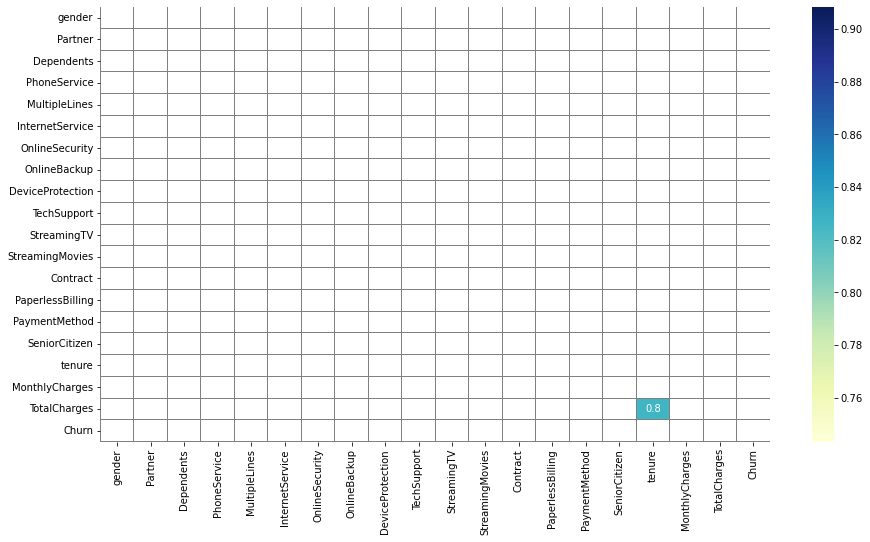

In [ ]:
# Correlacao variaveis em X e target y
df_aux = pd.concat([X, y], axis=1)

corr = df_aux.corr(method='pearson')

plt.figure(figsize=(15,8))
absoluto = np.abs(corr)
# fazendo um corte nos valores a serem mostrados
corte = absoluto[(absoluto >= 0.7)]

matriz = np.triu(corte)

sns.heatmap(corte, mask= matriz, annot=True, linewidths=0.01,  linecolor='gray', cmap='YlGnBu', fmt='.1g')

Conclusão: Não encontramos vazamentos na variável target Churn sem corr. Encontramos uma forte correlação entre tenure (total de meses que um cliente está na empresa) e TotalCharges (custo total do cliente até o final do trimestre)

In [ ]:
# Mostrando o balanceamento da variavel resposta
y.value_counts(normalize=True)

0    0.734215
1    0.265785
Name: Churn, dtype: float64

Conclusão: Apesar da literatura considerar um dado desbalanceado quando uma classe represante menos de 30%, o valor de 26% para a variável que indica a saida do cliente é satisfatório. Assim, iremos comparar os resultados da amostra antes e após o balanceamento para verificar a melhor abordagem.

In [ ]:
# Seleção de variaveis via RFE
from sklearn.svm import SVC
from sklearn.feature_selection import RFE, RFECV

estimator= SVC(kernel='linear')
selector = RFE(estimator, step=100)
selector = selector.fit(X, y)
f = selector.get_support(1)
X_sel = X[X.columns[f]]
X_sel

,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,SeniorCitizen
0,0,0,0,1,0,0,0,0,0
1,1,0,1,0,0,0,0,1,0
2,1,0,1,1,0,0,0,0,0
3,0,0,1,0,1,0,0,1,0
4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
7038,1,1,1,0,1,1,1,1,0
7039,1,1,0,1,0,1,1,1,0
7040,0,0,1,0,0,0,0,0,0
7041,1,1,0,0,0,0,0,0,1


Conclusão: Seleção de variáveis por RFE (~8minutos executando) filtrou 9 variáveis em X_sel

## 5 - Escolha da modelagem (sem o balanceamento)

###### Nesta etapa vocês tem a oportunidade de fazer inúmeros testes com diferentes técnicas de modelagem. Por exemplo, se o problema que está sendo trabalhado corresponde a uma classificação, diversas técnincas de machine learning podem ser testadas, como Árvores de decisão, Regressão logística, Random Forest, KNN, entre outras. Para mais detalhes (https://developers.google.com/machine-learning/crash-course)

In [ ]:
# Dividir em conjunto de teste e treino
from sklearn.model_selection import train_test_split

# divide os dados para treino e teste de modo estratificado
X_train, X_test, y_train, y_test = train_test_split(X_sel, y,
                                                    test_size=0.3, #30% para teste train
                                                    stratify=y,
                                                    random_state=420) #semente 

In [ ]:
# Cross validation com RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# cross validation com n_splits = 5
skf = StratifiedKFold(n_splits=5)
acc_dt = []

# pega um pedaco para treino outro para validacao em X e Y
for tr_idx, vl_idx in skf.split(X_train, y_train):
  X_train_f, X_valid_f = X_train.iloc[tr_idx], X_train.iloc[vl_idx]
  y_train_f, y_valid_f = y_train.iloc[tr_idx], y_train.iloc[vl_idx]
    
  clf = RandomForestClassifier(random_state=42, n_estimators=10, max_leaf_nodes=30, min_samples_split=15, min_samples_leaf = 10).fit(X_train_f, y_train_f.values.ravel())

  y_pred_f = clf.predict(X_valid_f)
    
  acc_dt.append(accuracy_score(y_valid_f, y_pred_f))

print("Acurácia média =",np.mean(acc_dt)*100," %.")

Acurácia média = 76.0261441954521  %.


Conclusão: Utilizando cross validation com 5 splits, obtemos na fase de treino uma acurácia média de 76%

In [ ]:
# Grid search 

from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': [30,20,4], 'min_samples_split':[20,15,3], 'min_samples_leaf':[30,20,10]}
# no RF quanto mais estimadores melhor o modelo
grid_search_cv = GridSearchCV(RandomForestClassifier(n_estimators=10, random_state=42), params, verbose=1, cv=3, scoring='roc_auc')
grid_search_cv.fit(X_train, y_train)
grid_search_cv.best_params_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


{'max_leaf_nodes': 30, 'min_samples_leaf': 20, 'min_samples_split': 20}

Conclusão: Através do grid search, vamos configurar o modelo para utilizar os parâmetros ajustados para treinar o modelo com o conjunto de teste. 



In [ ]:
# treina o modelo com o conjunto de treino
clfAll = RandomForestClassifier(random_state=42, n_estimators=10, max_leaf_nodes=20, min_samples_split=20, min_samples_leaf = 20).fit(X_train, y_train.values.ravel())

y_pred = clfAll.predict(X_test)

print("Acurácia =",accuracy_score(y_test, y_pred)*100," %.")

Acurácia = 76.77725118483413  %.


Conclusão: Obtemos uma acurácia de 76% no conjunto de teste após o modelo ser treinado.

## 6 - Avaliação dos resultados (sem o balanceamento)


###### Na etapa de avaliação dos resultados podemos implementar algumas métricas de performance que nos dão informações se o modelo está performando bem ou mal. Dentre elas estão a acurácia, F1-score, Curva ROC, entre outras. Para mais informações (https://medium.com/@MohammedS/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b)

In [ ]:
from sklearn import metrics

# Avaliacao Acuracia
metrics.accuracy_score(y_test, y_pred)

0.7677725118483413

In [ ]:
# Avaliação curva ROC

y_pred_proba = clfAll.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
metrics.auc(fpr, tpr)

0.8081385380022071

In [ ]:
# metricas
print(metrics.classification_report(y_test, y_pred,target_names=['Não','Sim']))

              precision    recall  f1-score   support

         Não       0.80      0.91      0.85      1549
         Sim       0.60      0.37      0.46       561

    accuracy                           0.77      2110
   macro avg       0.70      0.64      0.65      2110
weighted avg       0.75      0.77      0.75      2110



Conclusão: Precisão de 60% para Sim, ou seja, para o cliente deixar a empresa, com acurácia de 77% e 80% curva ROC.

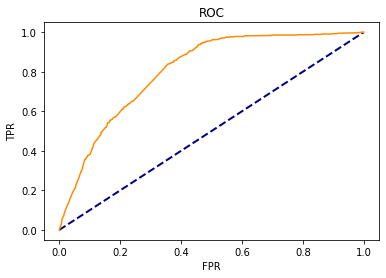

In [ ]:
# Visualizar curva ROC
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve, auc

plt.figure()
lw= 2
y_pred_proba = clf.predict_proba(X_test)[:,1]
fpr, tpr, _  = roc_curve(y_test, y_pred_proba)
auc_roc = roc_auc_score(y_test, y_pred_proba)
plt.plot([0,1], [0, 1], color='navy', lw=lw, linestyle = '--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %auc_roc, color='darkorange')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')

plt.show()

PR AUC:  0.545423615567116
ROC AUC:  80.55165255256395
[[0.67156398 0.06255924]
 [0.17061611 0.09526066]]


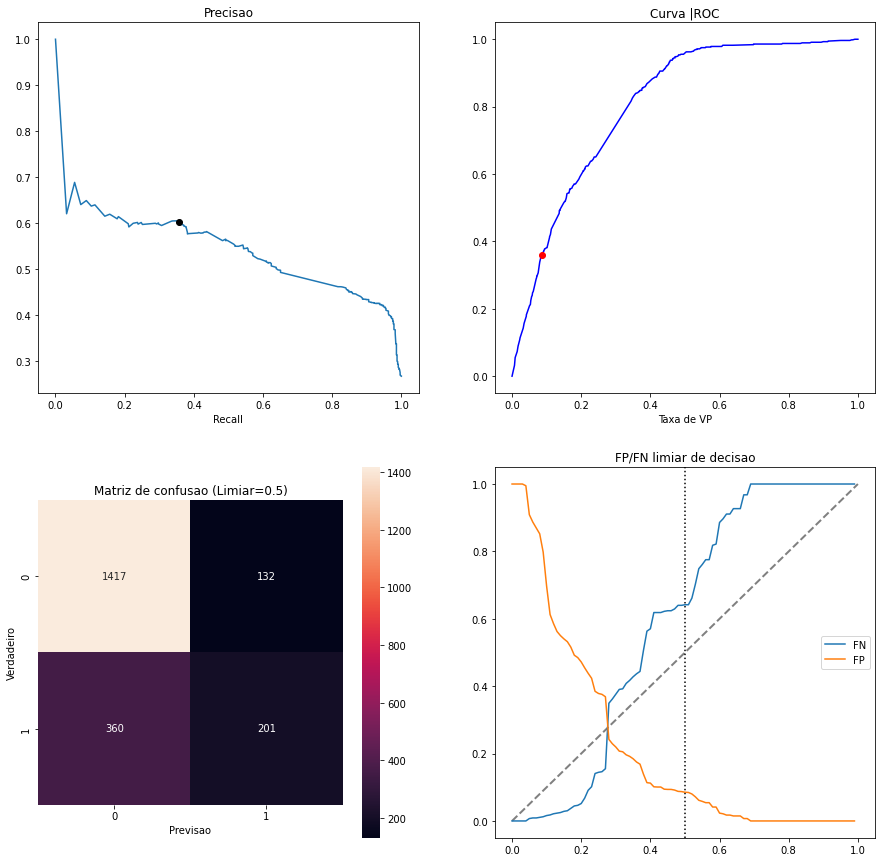

In [ ]:
# Graficos aula
from sklearn.metrics import confusion_matrix

th = 0.5

fig, axes = plt.subplots(ncols=2,  nrows = 2, figsize=(15, 15))

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
loc =  np.argmin(np.abs(thresholds-th))
print('PR AUC: ', auc(recall, precision))
axes[0,0].plot(recall, precision)
axes[0,0].plot(recall[loc], precision[loc], 'ko')
axes[0,0].set_title('Curva de precisao recall')
axes[0,0].set_xlabel('Recall')
axes[0,0].set_title('Precisao')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
loc = np.argmin(np.abs(thresholds-th))
print('ROC AUC: ', auc(fpr, tpr)*100)
axes[0,1].plot(fpr, tpr, color='blue', label='ROC')
axes[0,1].plot(fpr[loc], tpr[loc], color='red',marker= 'o',  label='ROC')
plt.plot([0,1], [0, 1], color='grey', lw=lw, linestyle = '--')
axes[0,1].set_title('Taxa de FP')
axes[0,1].set_xlabel('Taxa de VP')
axes[0,1].set_title('Curva |ROC')

limiar =th

cm = confusion_matrix(y_test, (y_pred_proba>=th))
print(cm/np.sum(cm))

sns.heatmap(cm, vmax=np.max(cm), vmin=np.min(cm), annot=True, square=True, fmt='g', ax=axes[1,0])
axes[1,0].set_title('Matriz de confusao (Limiar={})'.format(limiar))
axes[1,0].set_xlabel('Previsao')
axes[1,0].set_ylabel('Verdadeiro')

lista_fn = []
lista_fp = []
x = []

for i in np.arange(0,1, 0.01):
    cm =confusion_matrix(y_test, (y_pred_proba>=i))
    lista_fn.append(cm[1,0]/(cm[1,0]+cm[1,1]))
    lista_fp.append(cm[0,1]/(cm[0,1]+cm[0,0]))
    x.append(i)

axes[1,1].axvline(th, color='k', linestyle=':')
axes[1,1].plot(x, lista_fn, label='FN')
axes[1,1].plot(x, lista_fp, label='FP')
axes[1,1].set_title('FP/FN limiar de decisao')
axes[1,1].legend()

* **MATRIZ DE CONFUSÃO**: A matriz de confusão indica que o Falso Positivo (360)
é pequeno em relação ao Verdadeiro positivo (1417), ou seja, o modelo prevê bem quais clientes permanecerão na empresa no semestre. Já a proporção do Falso Negativo em relação ao resultado Negativo total é aproximadamente 39,63%, de forma que o diagnóstico de saída de um cliente não é confiável.
* **PRECISION-RECALL**: A curva Precision_Recall indica que o modelo está retornando resultados medianamente precisos (Precision de 60%), ou seja, tem uma taxa mediana de falsos positivos. Além disso, o modelo não retorna a maioria de todos os resultados positivos (Recall de 37%), ou seja, possui uma taxa de falsos negativos ligeiramente elevada. Dessa forma, adaptações devem ser realizadas para melhorar tais indicadores

## 7 - Escolha da modelagem (com o balanceamento)

In [ ]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X_train, y_train)

In [ ]:
print(f'''Shape de X antes do balanceamento: {X.shape}
Shape de X depois do balanceamento: {X_sm.shape}''')

print('\nNovo balanceamento da variável resposta (%):')
y_sm.value_counts(normalize=True) * 100

Shape de X antes do balanceamento: (7032, 19)
Shape de X depois do balanceamento: (7228, 9)

Novo balanceamento da variável resposta (%):


1    50.0
0    50.0
Name: Churn, dtype: float64

In [ ]:
# Dividir em conjunto de teste e treino
from sklearn.model_selection import train_test_split

# divide os dados para treino e teste de modo estratificado
X_train, X_test, y_train, y_test = train_test_split(X_sm,
                                                    y_sm,
                                                    test_size=0.3, #30% para teste train
                                                    random_state=42) #semente 

In [ ]:
# Cross validation com RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# cross validation com n_splits = 5
skf = StratifiedKFold(n_splits=5)
acc_dt = []

# pega um pedaco para treino outro para validacao em X e Y
for tr_idx, vl_idx in skf.split(X_train, y_train):
  X_train_f, X_valid_f = X_train.iloc[tr_idx], X_train.iloc[vl_idx]
  y_train_f, y_valid_f = y_train.iloc[tr_idx], y_train.iloc[vl_idx]
    
  clf = RandomForestClassifier(random_state=42, n_estimators=10, max_leaf_nodes=30, min_samples_split=15, min_samples_leaf = 10).fit(X_train_f, y_train_f.values.ravel())

  y_pred_f = clf.predict(X_valid_f)
    
  acc_dt.append(accuracy_score(y_valid_f, y_pred_f))

print("Acurácia média =",np.mean(acc_dt)*100," %.")

Acurácia média = 72.91944734403772  %.


In [ ]:
# Grid search 

from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': [30,20,4], 'min_samples_split':[20,15,3], 'min_samples_leaf':[30,20,10]}
# no RF quanto mais estimadores melhor o modelo
grid_search_cv = GridSearchCV(RandomForestClassifier(n_estimators=10, random_state=42), params, verbose=1, cv=3, scoring='roc_auc')
grid_search_cv.fit(X_train, y_train)
grid_search_cv.best_params_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


{'max_leaf_nodes': 30, 'min_samples_leaf': 10, 'min_samples_split': 20}

Conclusão: Através do grid search, vamos configurar o modelo para utilizar os parâmetros ajustados para treinar o modelo com o conjunto de teste. 



In [ ]:
# treina o modelo com o conjunto de treino
clfAll = RandomForestClassifier(random_state=42, n_estimators=10, max_leaf_nodes=30, min_samples_split=10, min_samples_leaf = 20).fit(X_train, y_train.values.ravel())

y_pred = clfAll.predict(X_test)

print("Acurácia =",accuracy_score(y_test, y_pred)*100," %.")

Acurácia = 73.76671277086216  %.


## 8 - Avaliação dos resultados (com o balanceamento)

###### Na etapa de avaliação dos resultados podemos implementar algumas métricas de performance que nos dão informações se o modelo está performando bem ou mal. Dentre elas estão a acurácia, F1-score, Curva ROC, entre outras. Para mais informações (https://medium.com/@MohammedS/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b)

In [ ]:
from sklearn import metrics

# Avaliacao Acuracia
metrics.accuracy_score(y_test, y_pred)

0.7376671277086215

In [ ]:
# Avaliação curva ROC

y_pred_proba = clfAll.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
metrics.auc(fpr, tpr)

0.8152807710167902

In [ ]:
# metricas
print(metrics.classification_report(y_test, y_pred,target_names=['Não','Sim']))

              precision    recall  f1-score   support

         Não       0.81      0.63      0.71      1103
         Sim       0.69      0.85      0.76      1066

    accuracy                           0.74      2169
   macro avg       0.75      0.74      0.74      2169
weighted avg       0.75      0.74      0.73      2169



Conclusão: Precisão de 69% para Sim para o cliente deixar a empresa, com acurácia de 74% e 81% curva ROC.

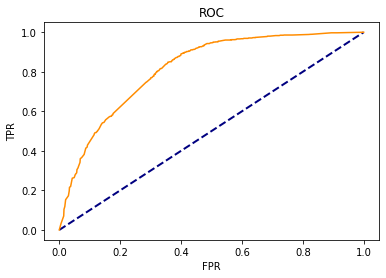

In [ ]:
# Visualizar curva ROC
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve, auc

plt.figure()
lw= 2
y_pred_proba = clf.predict_proba(X_test)[:,1]
fpr, tpr, _  = roc_curve(y_test, y_pred_proba)
auc_roc = roc_auc_score(y_test, y_pred_proba)
plt.plot([0,1], [0, 1], color='navy', lw=lw, linestyle = '--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %auc_roc, color='darkorange')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')

plt.show()

PR AUC:  0.7769640782228534
ROC AUC:  81.57663986501082
[[0.32780083 0.18072845]
 [0.07699401 0.41447672]]


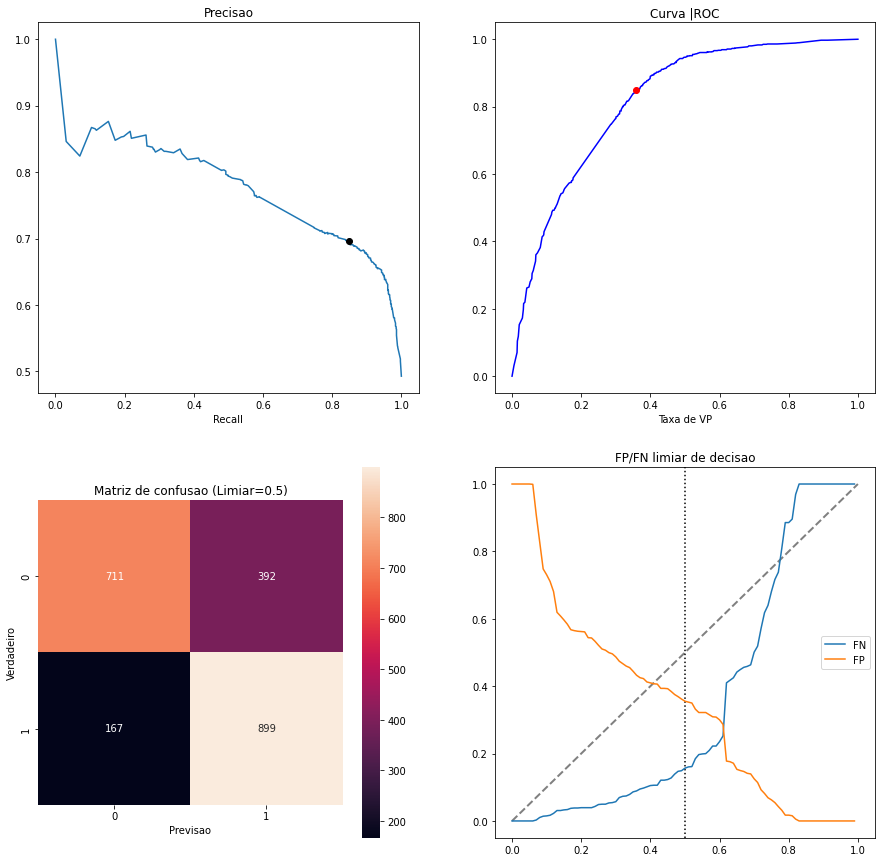

In [ ]:
# Graficos aula
from sklearn.metrics import confusion_matrix

th = 0.5

fig, axes = plt.subplots(ncols=2,  nrows = 2, figsize=(15, 15))

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
loc =  np.argmin(np.abs(thresholds-th))
print('PR AUC: ', auc(recall, precision))
axes[0,0].plot(recall, precision)
axes[0,0].plot(recall[loc], precision[loc], 'ko')
axes[0,0].set_title('Curva de precisao recall')
axes[0,0].set_xlabel('Recall')
axes[0,0].set_title('Precisao')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
loc = np.argmin(np.abs(thresholds-th))
print('ROC AUC: ', auc(fpr, tpr)*100)
axes[0,1].plot(fpr, tpr, color='blue', label='ROC')
axes[0,1].plot(fpr[loc], tpr[loc], color='red',marker= 'o',  label='ROC')
plt.plot([0,1], [0, 1], color='grey', lw=lw, linestyle = '--')
axes[0,1].set_title('Taxa de FP')
axes[0,1].set_xlabel('Taxa de VP')
axes[0,1].set_title('Curva |ROC')

limiar =th

cm = confusion_matrix(y_test, (y_pred_proba>=th))
print(cm/np.sum(cm))

sns.heatmap(cm, vmax=np.max(cm), vmin=np.min(cm), annot=True, square=True, fmt='g', ax=axes[1,0])
axes[1,0].set_title('Matriz de confusao (Limiar={})'.format(limiar))
axes[1,0].set_xlabel('Previsao')
axes[1,0].set_ylabel('Verdadeiro')

lista_fn = []
lista_fp = []
x = []

for i in np.arange(0,1, 0.01):
    cm =confusion_matrix(y_test, (y_pred_proba>=i))
    lista_fn.append(cm[1,0]/(cm[1,0]+cm[1,1]))
    lista_fp.append(cm[0,1]/(cm[0,1]+cm[0,0]))
    x.append(i)

axes[1,1].axvline(th, color='k', linestyle=':')
axes[1,1].plot(x, lista_fn, label='FN')
axes[1,1].plot(x, lista_fp, label='FP')
axes[1,1].set_title('FP/FN limiar de decisao')
axes[1,1].legend()

* **MATRIZ DE CONFUSÃO**: A matriz de confusão indica que o Falso Positivo (167)
é pequeno em relação ao Verdadeiro positivo (711), ou seja, o modelo prevê bem quais clientes permanecerão na empresa no semestre. A proporção do Falso Negativo em relação ao resultado Negativo total é aproximadamente 30,36%, tornando mais confiante o diagnóstico permanência de um cliente, em relação ao modelo desbalanceado. Assim, o resultado o que cumpre o propósito da análise de prever um meio de reter os clientes já que permite que a empresa identifique bem os clientes insatisfeitos e adote estratégias para a manutenção desses anteriormente às suas potenciais saídas.
* **PRECISION-RECALL**: A curva Precision_Recall indica que o modelo está retornando resultados melhores do que no caso do modelo desbalanceado (Precision de 69% em relação a 60%, do teste anterior). O indicador Recall teve uma melhoria ainda mais notável, passando de 37% para 85%, de forma que o modelo agora possui uma taxa de falsos negativos baixa.
* **CONCLUSÃO**: houve uma redução na acurácia do modelo em 3% após o balanceamento, contudo, as melhorias nos indicadores precision, recall e na matriz de confusão compensão tal perda, tornando o modelo balanceado mais eficiente.

In [ ]:
# Comparacao modelo aleatorio
y_test_df = y_test.to_frame()
y_test_df.loc[:,'pred'] =  y_pred_proba
y_test_df

,Churn,pred
2020,0,0.619453
6956,1,0.787192
3043,0,0.214114
5495,1,0.345386
1383,0,0.619453
...,...,...
3127,0,0.704968
2561,1,0.594509
2516,1,0.782608
416,0,0.071358


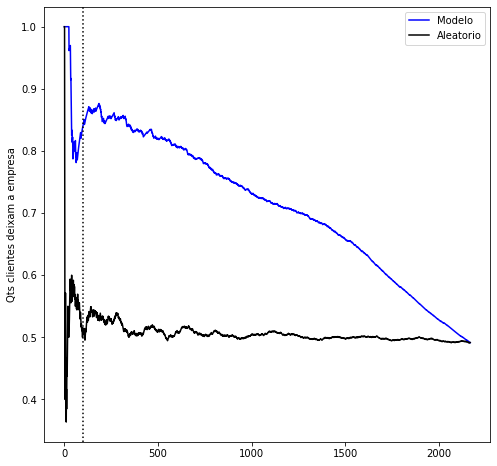

In [ ]:
# Comparacao modelo aleatorio
plt.figure(figsize=(8,8))
ax = plt.subplot(1,1,1)
aux = y_test_df.sort_values('pred', ascending=False).reset_index()
aux.loc[:, 'y_win'] = aux.Churn.cumsum().div(np.arange(1,aux.shape[0]+1))
aux.y_win.plot(color='b', label='Modelo')

aux2 = y_test_df.sort_values('pred', ascending=False).sample(frac=1).reset_index()
aux2.loc[:, 'y_win'] = aux2.Churn.cumsum().div(np.arange(1,aux.shape[0]+1))
aux2.y_win.plot(color='k', label='Aleatorio')

plt.ylabel('Qts clientes deixam a empresa')
plt.axvline(100, color='k', linestyle=':')

plt.legend();

Conclusão: Curva do modelo acima da curva aleatória, logo temos mais acertos via modelagem do que no modo aleatório.

In [ ]:
# Importancia das variaveis
imps= clf.feature_importances_
cols = X_test.columns
order = np.argsort(imps)[::-1]

for col, imp in zip(cols[order], imps[order]):
    print(f'{col:30s} | {imp:7.3f}')

Contract                       |   0.701
OnlineSecurity                 |   0.092
StreamingTV                    |   0.048
TechSupport                    |   0.043
StreamingMovies                |   0.041
MultipleLines                  |   0.025
OnlineBackup                   |   0.023
SeniorCitizen                  |   0.019
PhoneService                   |   0.008


(array([8.1988743 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.01594747,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.28517824]),
 array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
        0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
        1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
        1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ]),
 <a list of 19 Patch objects>)

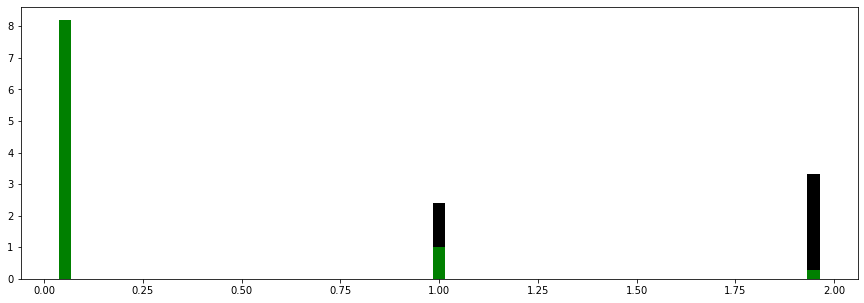

In [ ]:
M = X_test['Contract'].max()
plt.figure(figsize=(15,5))
plt.hist(X_test.loc[y_test==0]['Contract'], bins=np.linspace(0,M, 20), color='black',  density=True, rwidth=.3)
plt.hist(X_test.loc[y_test==1]['Contract'], bins=np.linspace(0,M, 20), color='green',  density=True, rwidth=.3)

Conclusão: Com a importância da variável Contrato temos que os clientes com contratos de mês-a-mês tem mais chance de deixar a empresa no próximo trimestre (cor verde), clientes com contratos de um ano estão em um patamar intermediário para deixar a empresa de deixar a empresa e clientes com contrados de dois anos tem menor probabilidade de deixar a empresa no próximo trimestre.